El codigo determinara si la calidad de un licuado de chocomilk es mala, media o buena.

---

ENTRADAS: 


Precio:

    Caro
    Medio
    Barato

  Material:

    Bueno
    Medio
    Malo

SALIDA

  Efecto:

    Alto
    Medio
    Bajo

REGLAS:

 Si el precio es alto y el material es bueno, el efecto del licuado de   chocomilk es alto.

 Si el precio es medio y el material es medio, el efecto del licuado de chocomilk es media.

 si el precio es bajo y el material es malo, el efecto del licuado de chocomilk es malo.

In [1]:
!pip install networkx==2.3
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=0439c48bd8f507bd784f7c688b35d64dd92e978c7a9d5250be634d104179244b
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


precio = ctrl.Antecedent(np.arange(0, 11, 1), 'precio')
material = ctrl.Antecedent(np.arange(0, 11, 1), 'material')
efecto = ctrl.Consequent(np.arange(0, 11, 1), 'efecto')


material.automf(names=['malo', 'medio', 'bueno'])
precio.automf(names=['bajo', 'medio', 'alto'])

efecto['malo'] = fuzz.trimf(efecto.universe, [0, 0, 5])
efecto['medio'] = fuzz.trimf(efecto.universe, [0, 5, 10])
efecto['alto'] = fuzz.trimf(efecto.universe, [5, 10, 10])

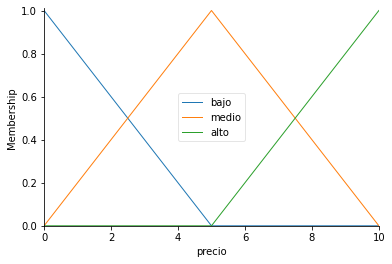

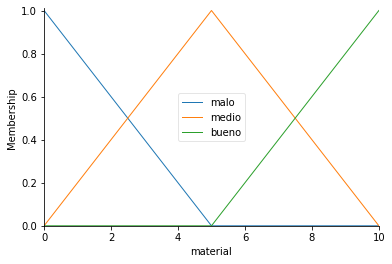

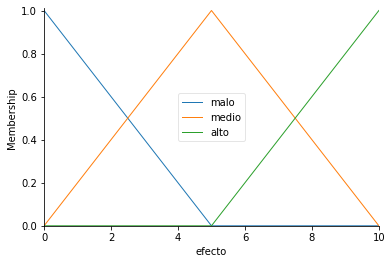

In [3]:
precio.view()
material.view()
efecto.view()

In [4]:
R1 = ctrl.Rule(precio['alto'] & material['bueno'], efecto['alto'])
R2 = ctrl.Rule(material['medio'], efecto['medio'])
R3 = ctrl.Rule(precio['bajo'] | material['malo'], efecto['malo'])
R4 = ctrl.Rule(precio['medio'] & material['bueno'], efecto['alto'])

In [5]:
efecto_ctrl = ctrl.ControlSystem([R1,R2,R3,R4])
efecto_sim = ctrl.ControlSystemSimulation(efecto_ctrl)

efecto_sim.input['precio'] = 6.5
efecto_sim.input['material'] =9.4

efecto_sim.compute()

In [6]:
# ====== precio ========
print("=======precio======")
input = 6.5
for t in precio.terms: 
  mval = np.interp(input, precio.universe, precio[t].mf)
  print(t, mval)

# ====== material ========
print("\n=======material======")
input = 9.4
for t in material.terms: 
  mval = np.interp(input, material.universe, material[t].mf)
  print(t, mval)

=======precio======
bajo 0.0
medio 0.7
alto 0.30000000000000004

=======material======
malo 0.0
medio 0.11999999999999994
bueno 0.8800000000000001


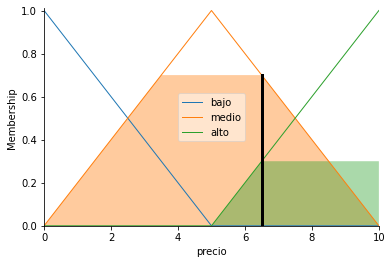

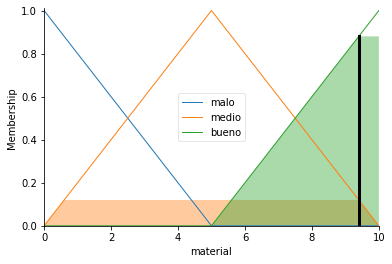

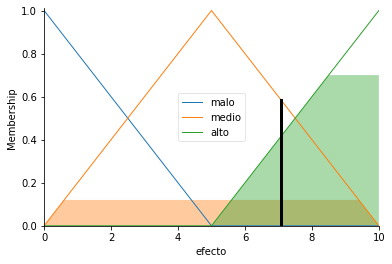

In [7]:
precio.view(sim=efecto_sim)
material.view(sim=efecto_sim)
efecto.view(sim=efecto_sim)

In [8]:

print("efecto :",efecto_sim.output['efecto'])


efecto : 7.074381970794527
